In [13]:
class TreeNode {
    constructor(key, val, left = null, right = null, parent = null) {
        this.key = key;
        this.payload = val;
        this.left = left;
        this.right = right;
        this.parent = parent;
    }
    
    hasLeftChild() {
        return this.left !== null;
    }
    
    hasRightChild() {
        return this.right !== null;
    }
    
    isLeftChild() {
        return this.parent !== null && this.parent.left === this;
    }
    
    isRightChild() {
        return this.parent !== null && this.parent.right === this;
    }
    
    isRoot() {
        return this.parent === null;
    }
    
    isLeaf() {
        return !(this.hasAnyChildren() );
    }
    
    hasAnyChildren() {
        return this.hasLeftChild() || this.hasRightChild();
    }
    
    hasBothChildren() {
        return this.hasLeftChild() && this.hasRightChild();
    }
    
    replaceNodeData(key, value, left, right) {
        this.key = key;
        this.payload = value;
        this.left = left;
        this.right = right;
        if(this.hasLeftChild()) {
            this.left.parent = this;
        }
        if(this.hasRightChild()) {
            this.right.parent = this;
        }
    }
    
    findSuccessor() {
        let successor;
        if(this.hasRightChild()) {
            successor = this.right.findMin();
        }
        else {
            if(this.parent !== null) {
                if(this.isLeftChild()) {
                    successor = this.parent;
                }
                else {
                    this.parent.right = null;
                    successor = this.parent.findSucessor();
                    this.parent.right = this;
                }
            }
        }
        return successor;
    }
    
    findMin() {
        let current = this;
        while(current.hasLeftChild()) {
            current = current.left;
        }
        return current;
    }
    
    spliceOut() {
        if(this.isLeaf()) {
            if(this.isLeftChild()) {
                this.parent.left = null;
            }
            else {
                this.parent.right = null;
            }
        }
        else if (this.hasAnyChild()) {
            if(this.hasLeftChild()) {
                if(this.isLeftChild()) {
                    this.parent.left = this.left;
                }
                else {
                    this.parent.right = this.left;
                }
                this.left.parent = this.parent;
            }
            else {
                if(this.isleftChild()) {
                    this.parent.left = this.right;
                }
                else {
                    this.parent.right = this.right;
                }
                this.right.parent = this.parent;
            }
        }
    }
}


const root = Symbol('root');

class BinarySearchTree {
    constructor() {
        this[root] = null;
        this.size = 0;
    }
    
    get length() {
        return this.size;
    }
    
    inOrder(node = this[root]) {
        if(node !== null) {
            this.inOrder(node.left);
            console.log(node.payload);
            this.inOrder(node.right);
        }
    }
    
    put(key, val) {
        if(this[root] !== null) {
            this._put(key, val, this[root]);
        }
        else {
            this[root] = new TreeNode(key, val);
        }
        this.size++;
    }
    
    _put(key, val, currentNode) {
        if (key < currentNode.key) {
            if(currentNode.hasLeftChild()) {
                this._put(key, val, currentNode.left);
            }
            else {
                currentNode.left = new TreeNode(key, val, null, null, currentNode);
            }
        }
        else {
            if(currentNode.hasRightChild()) {
               this._put(key, val, currentNode.right);
            }
            else {
                currentNode.right = new TreeNode(key, val, null, null, currentNode);
            }
        }
    }
    
    
    get(key) {
        if(this[root] === null) {
            return undefined;
        }
        const result = this._get(key, this[root]);
        return result ? result : undefined;
    }
    
    _get(key, currentNode) {
        if(currentNode === null) {
            return undefined;
        }
        else if(currentNode.key === key) {
            return currentNode;
        }
        else if (key < currentNode.key) {
            return this._get(key, currentNode.left);
        }
        else {
            return this._get(key, currentNode.right);
        }
    }
    
    del(key) {
        if(this.size > 1) {
            const nodeToRemove = this._get(key, this[root]);
            if(nodeToRemove) {
                this.remove(nodeToRemove);
                this.size--;
            }
            else {
                return undefined;
            }
        }
        else if(this.size === 1 && this[root].key === key) {
            this[root] = null;
            this.size--;
        }
        else {
            return undefined;
        }
    }
    
    remove(currentNode) {
        if(currentNode.isLeaf()) {
            if (currentNode.isLeftChild()) {
                currentNode.parent.left = null;
            }
            else {
                currentNode.parent.right = null;
            }
        }
        else if(currentNode.hasBothChildren()) {
            let successor = currentNode.findSuccessor();
            successor.spliceOut();
            currentNode.key = successor.key;
            currentNode.payload = successor.payload;
        }
        else {
            if(currentNode.hasLeftChild()) {
                if(currentNode.isLeftChild()) {
                    currentNode.left.parent = currentNode.parent;
                    currentNode.parent.left = currentNode.left;
                }
                else if (currentNode.isRightChild()) {
                    currentNode.left.parent = currentNode.parent;
                    currentNode.parent.right = currentNode.left;
                }
                else {
                    currentNode.replaceNodeData(currentNode.left.key,
                                                currentNode.left.payload,
                                                currentNode.left.left,
                                                currentNode.left.right)
                }
            }
            else {
                if(currentNode.isLeftChild()) {
                    currentNode.right.parent = currentNode.parent;
                    currentNode.parent.left = currentNode.right;
                }
                else if(currentNode.isRightChild()) {
                    currentNode.right.parent = currentNode.parent;
                    currentNode.parent.right = currentNode.right;
                }
                else {
                    currentNode.replaceNodeData(currentNode.right.key,
                                                currentNode.right.payload,
                                                currentNode.right.left,
                                                currentNode.right.right)
                }
            }
        }
    }
}

## 938. Range Sum of BST (easy)
* given the root node of a binary search tree, return the sum of values of all nodes with value between L and R (inclusive).
* bst has unique values
* ex 1:
    - Input: root = [10,5,15,3,7,null,18], L = 7, R = 15
    - Output: 32
* ex 2:
    - Input: root = [10,5,15,3,7,13,18,1,null,6], L = 6, R = 10
    - Output: 23

***
Solution:
1. check if the current node's value is in range of L and R
    - if it is, add its value to the sum
2. if the current node has a left child, traverse the left
3. if it has a right child, traverse the right
4. return the sum

***
Tricks:
* it is waaaaay easier to use a closure when dealing with recursion
    - have the inner function recurse on itself
    - and this inner function will still have access to the outer function's variables without having to rewrite them for every function call
* when dealing with sums, have a sum variable on the outside of the recursive call to keep track of value
    - this is so you don't have to worry about returning anything for each call
* in addition, it is __EASIER TO CHECK IF CHILD IS NULL BEFORE TRAVERSING__
    - __if root.left === null or root.right === null, THEN DON'T BOTHER GOING INTO IT!!!!__
    - just leave it be and move on
    - just check whether the actual root of the tree is null once.
        - if it is, return 0 for the whole solution

In [32]:
function rangeSumBST(root, L, R) {
    if(root == null) return 0;
    
    let sum = 0;
    
    // use of a closure here
    // this inner function will have access to L, R, and sum
    // so we don't have to rewrite it again
    const traverse = root => {
        if(L <= root.payload && root.payload <= R) sum += root.payload;
        if(root.left !== null) traverse(root.left);
        if(root.right !== null) traverse(root.right);
    }
    
    // start the recursive calls
    traverse(root);
    
    return sum;
}

var tree = new BinarySearchTree();
tree.put(10, 10);
tree.put(5, 5,);
tree.put(15, 15);
tree.put(3, 3);
tree.put(7, 7);
tree.put(18, 18);
rangeSumBST(tree.get(10), 7, 15);

32

## 617. Merge Two Binary Trees
* Given two binary trees and imagine that when you put one of them to cover the other, some nodes of the two trees are overlapped while the others are not.
* You need to merge them into a new binary tree. The merge rule is that if two nodes overlap, then sum node values up as the new value of the merged node. Otherwise, the NOT null node will be used as the node of new tree.

***
Solution:
1. if one of the nodes are missing, we want to return the other
    - if t1 is null but t2 isn't return t2, etc
2. if both of them are present, then sum them both together
3. then we recurse and set the answer from those recursive calls to be left and right children of current node
    - t1.left = mergeTrees(t1.left, t2.left)
    - t2.right = mergeTrees(t1.right, t2.right)
4. then we return t1

***
Tricks:
* if you are trying to recreate a tree, you want this certain structure:

function traverse(node)
    
    // logic here
    
    // traverse on left and right
    node.left = traverse(node.left)
    node.right = traverse(node.right)
    
    return node

Input: 
	Tree 1                     Tree 2 
    
          1                         2                             
         / \                       / \                            
        3   2                     1   3                        
       /                           \   \                      
      5                             4   7                  
Output: 
Merged tree:

	     3
	    / \
	   4   5
	  / \   \ 
	 5   4   7

In [ ]:
var mergeTrees = function(t1, t2) {
    
    // if one of the nodes is missing, then return the other
    if(t1 === null) {
        return t2;
    }
    
    if(t2 === null) {
        return t1;
    }
    
    // if both of them exist, then sum their values
    t1.val += t2.val;
    
    // do the sam thing for the left and right subtrees
    t1.left = mergeTrees(t1.left, t2.left);
    t1.right = mergeTrees(t1.right, t2.right);
    
    // return the merged t1
    return t1;
}

## 104. Maximum Depth of Binary Tree
* Given a binary tree, find its maximum depth.
* The maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.
* Note: A leaf is a node with no children.

***
Solution:
1. if the root is null, just return 0
2. else, recurse on the left and right subtrees and add 1
3. return the max of the left or right subtrees

***
Tricks:
* pre-order traversal always comes in handy when doing stuff like this
* logic on top, then recurse on both left and right side

In [ ]:
Given binary tree [3,9,20,null,null,15,7],

    3
   / \
  9  20
    /  \
   15   7
return its depth = 3.

In [ ]:
var maxDepth = function(root) {
    if(root == null) { return 0; }
    
    // once we recurse to the bottom,
    // maxDepth will return 0 b/c root == null
    // then as we go up, we add 1
    // and return the max of left or right sides
    let left = maxDepth(root.left) + 1;
    let right = maxDepth(root.right) + 1;
    
    return Math.max(left, right);
};

## 589. N-ary Tree Preorder Traversal
* Given an n-ary tree, return the preorder traversal of its nodes' values.
* Nary-Tree input serialization is represented in their level order traversal, each group of children is separated by the null value (See examples).
* Follow up: Recursive solution is trivial, could you do it iteratively?

***
Solution (recursive):
1. create a variable nodeTracker = []
2. do a pre-order traversal of the tree and push the node's value to nodeTracker
3. for each of the current node's children, we recurse on it and add its value to nodeTracker
    - this question has node.children instead of node.left and node.right
        - node.children = [ {val: int, children: [] ]
Solution (iterative): similar to dfs
1. use a stack and push the root onto it
2. while the stack is not empty
    - pop a node off the stack
    - if it is not null, push its value to node tracker
    - then from root.children.length --> 0, push the children onto the stack
    - remember that a stack is LIFO. we want the left child to be traversed first so we have to push all the children starting from the right to the stack
    - this makes it so that once we pop the stack, we get the leftmost child!

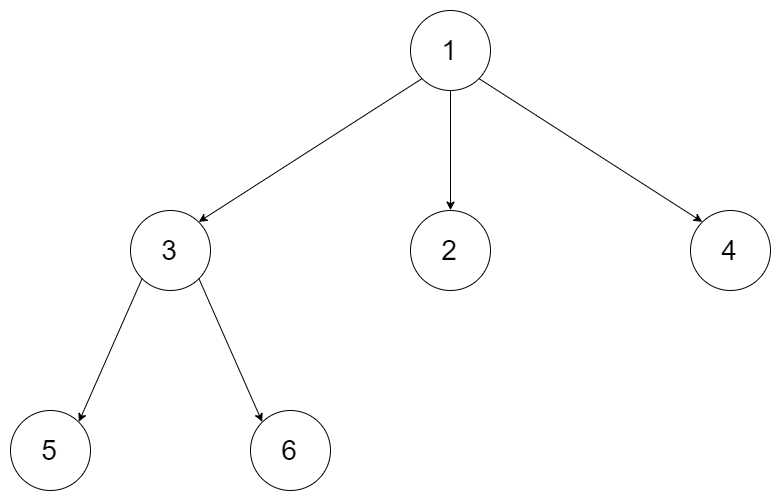

* Input: root = [1,null,3,2,4,null,5,6]
* Output: [1,3,5,6,2,4]

In [ ]:
/**
 * // Definition for a Node.
 * function Node(val, children) {
 *    this.val = val;
 *    this.children = children;
 * };
 */

/**
 * @param {Node} root
 * @return {number[]}
 */

// recursive solution
var preorder = function(root) {
    let nodeTracker = [];
    const traversal = (root) => {
        if(root !== null) {
            nodeTracker.push(root.val);
            root.children.forEach(child => traversal(child))
        }
    }
    traversal(root);
    return nodeTracker;
};

// iterative solution
var preorder = function(root) {
    let nodeTracker = [];
    let stack = [];
    stack.push(root);
    
    while(stack.length) {
        let currentNode = stack.pop();
        
        if(currentNode) {
            nodeTracker.push(currentNode.val);
            for(let i = currentNode.children.length - 1; i >= 0; i--) {
                stack.push(currentNode.children[i]);
            };  
        }
    }
    return nodeTracker;
}

## 590. N-ary Tree Postorder Traversal
* Given an n-ary tree, return the postorder traversal of its nodes' values.
* Nary-Tree input serialization is represented in their level order traversal, each group of children is separated by the null value (See examples).
* Follow up: Recursive solution is trivial, could you do it iteratively?

***
Solution (recursive):
1. same as preorder except you switch the operations of pushing and traversing
    - traverse on root.children first
    - then add the root's value to nodeTracker

Solution (iterative):
1. do a preorder traversal, and add root to nodeTracker
2. reverse nodeTracker and return it

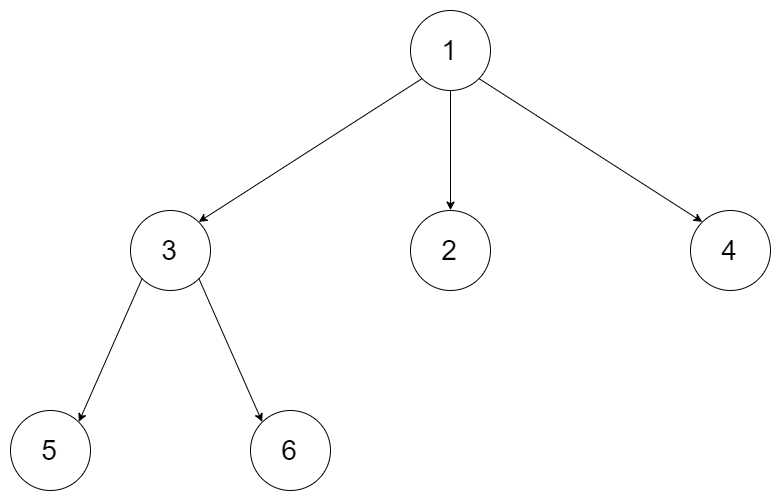

* Input: root = [1,null,3,2,4,null,5,6]
* Output: [5,6,3,2,4,1]

In [ ]:
/**
 * // Definition for a Node.
 * function Node(val,children) {
 *    this.val = val;
 *    this.children = children;
 * };
 */

/**
 * @param {Node} root
 * @return {number[]}
 */

// recursive solution
// basically preorder reversed
var postorder = function(root) {
    let nodeTracker = [];
    
    const traverse = root => {
        if(root !== null) {
            root.children.forEach(child => traverse(child))
            nodeTracker.push(root.val)
        }
    }
    
    traverse(root);
    
    return nodeTracker;
};

// recursive solution
// basically preorder, then reverse array
var postorder = function(root) {
    let nodeTracker = [];
    let stack = [];
    stack.push(root);
    
    while(stack.length) {
        let currentNode = stack.pop();
        
        if(currentNode) {
            nodeTracker.push(currentNode.val);
            for(let i = currentNode.children.length - 1; i >= 0; i--) {
                stack.push(currentNode.children[i]);
            };  
        }
    }
    nodeTracker.reverse();
    return nodeTracker;
}

## 559. Maximum Depth of N-ary Tree
* Given a n-ary tree, find its maximum depth.
* The maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.
* Nary-Tree input serialization is represented in their level order traversal, each group of children is separated by the null value (See examples).

***
Solution:
1. if root is null, return 0 (base case)
2. else if it is not, then have a var max = 0
3. for each child of the root, we traverse the child and get its depth
    - if the depth of child is greater than depth of max, the child is new max
4. then we return max + 1;
    - reason why we return max + 1 and not add 1 to traverse(child) is to take into account a leaf node
    - if the leaf node has no children, then we can't update the max in the forEach loop
    - thus, we have to add it to max after the loop is done which should the the current node as well

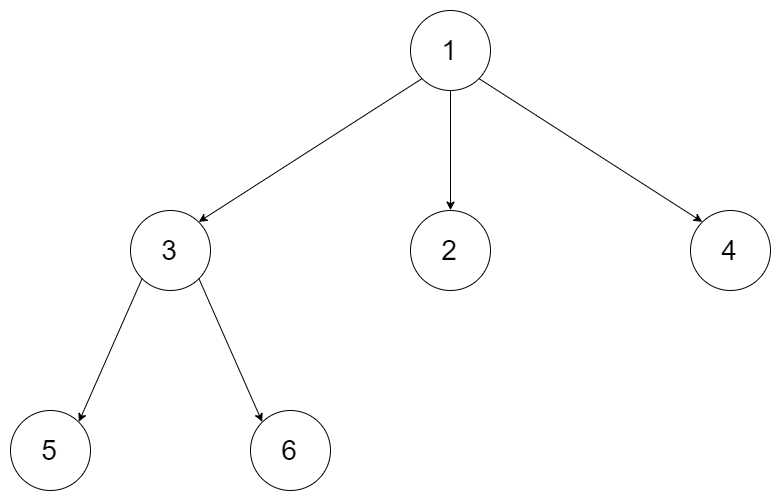

* Input: root = [1,null,3,2,4,null,5,6]
* Output: 3

In [ ]:
/**
 * // Definition for a Node.
 * function Node(val,children) {
 *    this.val = val;
 *    this.children = children;
 * };
 */

/**
 * @param {Node} root
 * @return {number}
 */
var maxDepth = function(root) {
    if (root == null) {
        return 0;
    }
    
    let max = 0;
    for (let child of root.children) {
        max = Math.max(max, maxDepth(child));
    }
    
    return max + 1;
};

## 669. Trim a Binary Search Tree
* Given the root of a binary search tree and the lowest and highest boundaries as low and high, trim the tree so that all its elements lies in [low, high]. Trimming the tree should not change the relative structure of the elements that will remain in the tree (i.e., any node's descendant should remain a descendant). It can be proven that there is a unique answer.

* Return the root of the trimmed binary search tree. Note that the root may change depending on the given bounds.

* Example 1:
    - Input: root = [1,0,2], low = 1, high = 2
    - Output: [1,null,2]
* Example 2:
    - Input: root = [3,0,4,null,2,null,null,1], low = 1, high = 3
    - Output: [3,2,null,1]
* Example 3:
    - Input: root = [1], low = 1, high = 2
    - Output: [1]
* Example 4:
    - Input: root = [1,null,2], low = 1, high = 3
    - Output: [1,null,2]
* Example 5:
    - Input: root = [1,null,2], low = 2, high = 4
    - Output: [2]

***
* Tricks:
    * basically a graph 

In [ ]:
/**
 * Definition for a binary tree node.
 * function TreeNode(val, left, right) {
 *     this.val = (val===undefined ? 0 : val)
 *     this.left = (left===undefined ? null : left)
 *     this.right = (right===undefined ? null : right)
 * }
 */
/**
 * @param {TreeNode} root
 * @param {number} low
 * @param {number} high
 * @return {TreeNode}
 */
var trimBST = function(root, low, high) {
    if(root == null) return null;
    
    root.left = trimBST(root.left, low, high);
    root.right = trimBST(root.right, low, high);
    
    if(low > root.val) {
        return root.right;
    }
    else if (high < root.val) {
        return root.left;
    }
    
    return root;
};

## 1022. Sum of Root To Leaf Binary Numbers

* You are given the root of a binary tree where each node has a value 0 or 1.  Each root-to-leaf path represents a binary number starting with the most significant bit.  For example, if the path is 0 -> 1 -> 1 -> 0 -> 1, then this could represent 01101 in binary, which is 13.
* For all leaves in the tree, consider the numbers represented by the path from the root to that leaf.
* Return the sum of these numbers. The answer is guaranteed to fit in a 32-bits integer.
* Example 1:
    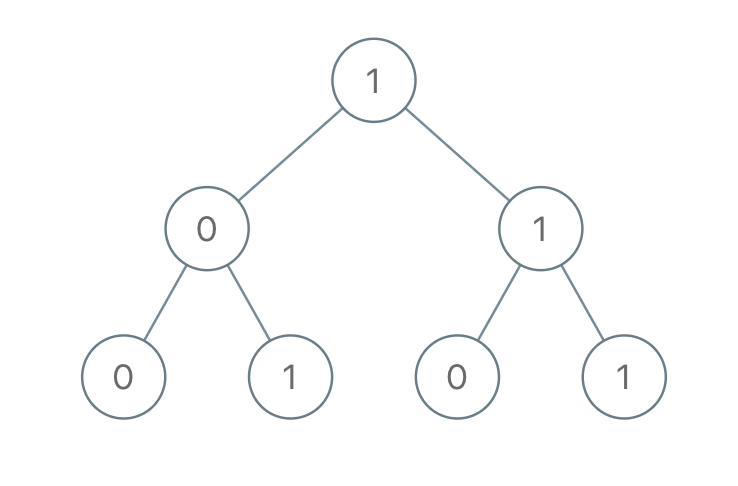
    - Input: root = [1,0,1,0,1,0,1]
    - Output: 22 
    - Explanation: (100) + (101) + (110) + (111) = 4 + 5 + 6 + 7 = 22
* Example 2:
    - Input: root = [0]
    - Output: 0
* Example 3:
    - Input: root = [1]
    - Output: 1
* Example 4:
    - Input: root = [1,1]
    - Output: 3
* Constraints: The number of nodes in the tree is in the range [1, 1000].
Node.val is 0 or 1.

***
* Basically, a typical traversal here
* I definitely overcomplicated my thinking here.
* if the current node is a leaf, then you add it to the running sum, if not, then keep traversing
* the mistake i made was that i was waiting until the current node was null to add. but since leaves have both children as null, then it was getting counted twice!
* so instead, if the root is null, just return and do nothing. then once the node meets the certain condition, i.e. of being a leaf, then we do some logic.

In [1]:
/**
 * Definition for a binary tree node.
 * function TreeNode(val, left, right) {
 *     this.val = (val===undefined ? 0 : val)
 *     this.left = (left===undefined ? null : left)
 *     this.right = (right===undefined ? null : right)
 * }
 */
/**
 * @param {TreeNode} root
 * @return {number}
 */
var sumRootToLeaf = function(root) {
    let sum = 0;
    
    const traverse = (root, sequence) => {
        if (root == null) return;
        
        sequence += root.val;
        
        if(root.left == null && root.right == null) {
            sum += parseInt(sequence, 2);
            return;
        }
        
        traverse(root.left, sequence);
        traverse(root.right, sequence);
    }
    
    traverse(root, '');
    
    return sum;
};

## 257. Binary Tree Paths

* https://leetcode.com/problems/binary-tree-paths/

In [1]:
/**
 * Definition for a binary tree node.
 * function TreeNode(val, left, right) {
 *     this.val = (val===undefined ? 0 : val)
 *     this.left = (left===undefined ? null : left)
 *     this.right = (right===undefined ? null : right)
 * }
 */
/**
 * @param {TreeNode} root
 * @return {string[]}
 */

/*
* simple preorder traversal
*/
var binaryTreePaths = function(root) {
    let paths = [];
    
    const traverse = (node, path) => {
        path += node.val;
        
        if (node.left === null && node.right === null) {
            paths.push(path);
            return;
        }
        if (node.left !== null) {
            traverse(node.left, path + "->");
        }
        if (node.right !== null) {
            traverse(node.right, path += "->");
        }
    }
    
    traverse(root, "");
    
    return paths;
};

## 538. Convert BST to Greater Tree

* https://leetcode.com/problems/convert-bst-to-greater-tree/

In [1]:
/**
 * Definition for a binary tree node.
 * function TreeNode(val, left, right) {
 *     this.val = (val===undefined ? 0 : val)
 *     this.left = (left===undefined ? null : left)
 *     this.right = (right===undefined ? null : right)
 * }
 */
/**
 * @param {TreeNode} root
 * @return {TreeNode}
 */

/*
* R --> L Inorder traversal
 - keep running-sum
 - add current val of node with running_sum and update running_sum as well!
 
* reasoning:
 - since we know that it's a BST, we can assume everything to the right and a direct ancestor of the node is greater than it
 - thus, we can start from the rightmost node and assume that nothing is greater than it
 - then as we move from R --> L, we just add the running_sum to the current node
 - this is b/c the running_sum acts as the sum of all nodes greater than the current node so far and we tally it 
 as we go
*/
var convertBST = function(root) {
    let running_sum = 0;
    
    const traverse = node => {
        if (node) {
            traverse(node.right);
            
            running_sum += node.val;
            
            node.val = running_sum;
            
            traverse(node.left);
        }
    }
    
    traverse(root);
    
    return root;
};

## 654. Maximum Binary Tree

* https://leetcode.com/problems/maximum-binary-tree/

In [ ]:
/**
 * Definition for a binary tree node.
 * function TreeNode(val, left, right) {
 *     this.val = (val===undefined ? 0 : val)
 *     this.left = (left===undefined ? null : left)
 *     this.right = (right===undefined ? null : right)
 * }
 */
/**
 * @param {number[]} nums
 * @return {TreeNode}
 */

/*
* time complexity: O(n^2)
* we just find the max of the current array, then we split into left and right:
 - left = [0 ... max - 1]
 - right = [max + 1 ... n] (I FORGOT TO DO MAX + 1 HERE SO I WAS GETTING TIME LIMIT EXCEEDED)
* then we repeat the process in the left and right subarrays and return the max node.

* average case: O(nlogn) b/c if the list was split evenly each time, we would only have to do this logn times. 
find the max is O(n)
* the reason why it is O(n^2) worst case is b/c if the list was sorted, the left or right subarrays would be very close
to O(n) in size and so we would have to repeat the process O(n) times. so O(n) times multiplied by O(n) for finding max
*/
var findMax = (nums) => {
    let max = 0;
    for (let i = 1; i < nums.length; i++) {
        if (nums[i] > nums[max]) max = i; 
    }
    return max;
}

var constructMaximumBinaryTree = function(nums) {
    if (nums.length === 0) return null;
    if (nums.length === 1) return new TreeNode(nums[0]);
    
    let max = findMax(nums);
    let node = new TreeNode(nums[max]);
    
    node.left = constructMaximumBinaryTree(nums.slice(0, max));
    node.right = constructMaximumBinaryTree(nums.slice(max + 1));
    return node;
};

/*
* O(n) solution
* in this solution, we can keep track of the current max in a stack
 - essentially, we keep track of the current max as the left-most item in the stack
 - we keep adding items into the stack if it is less than the current_max
 - then once we find an item greater than the max, then all those numbers in the stack are popped out
 
* ex: [3,2,1,6,0,5]
 1. stack: [3]. nothing in the stack so we just add 3.
 2. stack: [3,2], where 3.right = 2 b/c 3 is the current max, there's nothing to the left of 3 and 2 is to the right
 3. stack: [3, 2, 1] where 2.right = 1 b/c 2 is the current max of 3's right subtree, there's nothing to the left of 2 and 1 is the item to the right of 2 in the array
 4. stack: [6]. since 3,2,1 are all less than 6, they are popped out and 6 is now the current max. and since all of them are to the left of 6 in the nums array, they'll be in 6's left subtree. so 6.left = 1, then 6.left = 2, then finally, 6.left = 3.
 5. stack: [6, 0]. we can't pop anything out since 6 > 0. since 6 is the current max and 0 is to the right of 6 in the original array, 6.right = 0;
 6. stack: [6, 5]. since 0 < 5, we can pop out 0. and since any number popped out of the stack will always be to the left of the current node, 5.left = 0. also, since 6 is still in the stack and is the current max, we do 6.right = 5 since 5 is to the right of 6 in the original array
 7. we return stack[0] since that is where the max of the entire array is!
*/

var constructMaximumBinaryTree = function(nums) {
    if (nums.length === 0) return null;
    if (nums.length === 1) return new TreeNode(nums[0]);
    
    let stack = [];
    
    for (let i = 0; i < nums.length; i++) {
        let node = new TreeNode(nums[i]);
        // keep popping until until we reach a value that is > current or stack is empty
        while (stack.length !== 0 && stack[stack.length - 1].val < nums[i]) {
            node.left = stack.pop();
        }
        // if there is something in the stack, then our current node is less than the max so far
        // and it'll be to the right of it
        if (stack.length !== 0) {
            stack[stack.length - 1].right = node;
        }
        stack.push(node);
    }
    
    return stack[0];
}

## 701. Insert into a Binary Search Tree

* https://leetcode.com/problems/insert-into-a-binary-search-tree/

In [1]:
/**
 * Definition for a binary tree node.
 * function TreeNode(val, left, right) {
 *     this.val = (val===undefined ? 0 : val)
 *     this.left = (left===undefined ? null : left)
 *     this.right = (right===undefined ? null : right)
 * }
 */
/**
 * @param {TreeNode} root
 * @param {number} val
 * @return {TreeNode}
 */
var insertIntoBST = function(root, val) {
    if (root === null) return new TreeNode(val);
    
    const insert = node => {
        // belongs to left subtree
        if (node.val > val) {
            if (node.left === null) {
                node.left = new TreeNode(val);
                return;
            }
            else {
                insert(node.left);
            }
        }
        // belongs to left subtree
        else {
            if (node.right === null) {
                node.right = new TreeNode(val);
                return;
            }
            else {
                insert(node.right);
            }
        }
    }
    
    insert(root);
    
    return root;
};

## 1046. Last Stone Weight

* https://leetcode.com/problems/last-stone-weight/

In [1]:
/**
 * @param {number[]} stones
 * @return {number}
 */

const top = 0;
const parent = i => ((i + 1) >>> 1) - 1;
const left = i => (i << 1) + 1;
const right = i => (i + 1) << 1;

class PriorityQueue {
  constructor(comparator = (a, b) => a > b) {
    this._heap = [];
    this._comparator = comparator;
  }
  size() {
    return this._heap.length;
  }
  isEmpty() {
    return this.size() == 0;
  }
  peek() {
    return this._heap[top];
  }
  push(...values) {
    values.forEach(value => {
      this._heap.push(value);
      this._siftUp();
    });
    return this.size();
  }
  pop() {
    const poppedValue = this.peek();
    const bottom = this.size() - 1;
    if (bottom > top) {
      this._swap(top, bottom);
    }
    this._heap.pop();
    this._siftDown();
    return poppedValue;
  }
  replace(value) {
    const replacedValue = this.peek();
    this._heap[top] = value;
    this._siftDown();
    return replacedValue;
  }
  _greater(i, j) {
    return this._comparator(this._heap[i], this._heap[j]);
  }
  _swap(i, j) {
    [this._heap[i], this._heap[j]] = [this._heap[j], this._heap[i]];
  }
  _siftUp() {
    let node = this.size() - 1;
    while (node > top && this._greater(node, parent(node))) {
      this._swap(node, parent(node));
      node = parent(node);
    }
  }
  _siftDown() {
    let node = top;
    while (
      (left(node) < this.size() && this._greater(left(node), node)) ||
      (right(node) < this.size() && this._greater(right(node), node))
    ) {
      let maxChild = (right(node) < this.size() && this._greater(right(node), left(node))) ? right(node) : left(node);
      this._swap(node, maxChild);
      node = maxChild;
    }
  }
}

var lastStoneWeight = function(stones) {
    if (stones.length === 1) return stones[0];
    
    const pq = new PriorityQueue();
    pq.push(...stones);
    
    while ( pq.size() > 1 ) {
        let y = pq.pop();
        let x = pq.pop();
        
        if (x !== y) {
            pq.push(y - x);
        }
    }
    
    return pq.isEmpty() ? 0 : pq.pop();
};